# **Project Name**    - Cardiovascular risk prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

**Project Summary: Predicting Coronary Heart Disease Risk**

This project aims to develop a machine learning model to predict the risk of coronary heart disease (CHD) within the next 10 years for patients in Framingham, Massachusetts. The dataset includes records of over 4,000 patients, with 15 attributes covering demographic, behavioral, and medical risk factors.

The focus is on binary classification, with the target variable "TenYearCHD" indicating whether a patient is at risk (1) or not (0). Features include age, sex, education, smoking status, blood pressure, and cholesterol levels. Handling missing values and ensuring data consistency are critical during data preprocessing.

Feature engineering involves crafting new features or transforming existing ones to enhance model performance. Model selection includes exploring algorithms like logistic regression, decision trees, random forests, and support vector machines, evaluated on metrics like accuracy, precision, recall, and F1-score.

Hyperparameter tuning fine-tunes model performance using techniques like grid search or randomized search. Model evaluation involves assessing performance metrics and ensuring generalizability through cross-validation.

The success of the project is measured by the model's ability to accurately predict CHD risk, enabling healthcare professionals to identify high-risk individuals for timely interventions and personalized healthcare recommendations.

In conclusion, this project aims to leverage machine learning to predict CHD risk, contributing to preventive healthcare efforts and potentially reducing the burden of cardiovascular diseases.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/IAMDSVSSANGRAL/classificationcapestone

# **Problem Statement**


The objective of this project is to develop a machine learning model that can predict whether a patient is at risk of developing coronary heart disease (CHD) within the next 10 years. The dataset used for this project contains records of over 4,000 patients from an ongoing cardiovascular study in Framingham, Massachusetts. Each record consists of 15 attributes, including demographic, behavioral, and medical risk factors.

The primary task is binary classification, where the target variable is "TenYearCHD," indicating whether a patient is at risk of CHD (1) or not (0). The features include attributes such as age, sex, education level, smoking status, blood pressure measurements, cholesterol levels, and more. The dataset may also contain missing values that need to be handled appropriately.

By building an accurate predictive model, this project aims to assist healthcare professionals in identifying individuals at higher risk of CHD, allowing for early intervention and tailored healthcare recommendations to reduce the incidence of cardiovascular diseases.

Key objectives for the project include data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluating the model's performance using appropriate metrics. The success of this project will be measured by the model's ability to predict CHD risk with a high degree of accuracy and reliability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [345]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
#importing necessary liabrary for handling missing values
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline

### Dataset Loading

In [346]:
#mounting the google drive
drive.mount('/content/drive')

#assinging the path
path = "/content/drive/MyDrive/Almabetter Santa/classification - capestone/data_cardiovascular_risk.csv"

#read data from a CSV file into a DataFrame.
data_raw = pd.read_csv(path)

#create a copy of raw data
df = data_raw.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [347]:
# Dataset First Look
df.sample(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1721,1721,54,4.0,M,YES,15.0,0.0,0,0,0,300.0,128.0,80.0,27.30,68.0,NaN,0
1333,1333,45,3.0,M,YES,35.0,0.0,0,0,0,161.0,122.0,82.0,26.09,65.0,91.0,0
719,719,41,2.0,M,YES,30.0,0.0,0,1,0,176.0,146.0,88.0,24.04,78.0,83.0,0
2195,2195,45,2.0,M,YES,20.0,0.0,0,0,0,229.0,117.0,78.0,22.79,85.0,86.0,0
446,446,50,1.0,F,YES,20.0,0.0,0,1,0,248.0,154.5,104.0,19.88,75.0,87.0,0


### Dataset Rows & Columns count

In [348]:
# Dataset Rows & Columns count
rows, columns = df.shape

# Print the number of rows and columns
print("Number of Rows:", rows)
print("Number of Columns:", columns)

Number of Rows: 3390
Number of Columns: 17


### Dataset Information

In [349]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [350]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

# Print the count of duplicate values
print("Duplicate Value Count:", duplicate_count)


Duplicate Value Count: 0


#### Missing Values/Null Values

In [351]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values Count:")
print(missing_values_count)


Missing Values Count:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [352]:
#installing missingno
!pip install missingno

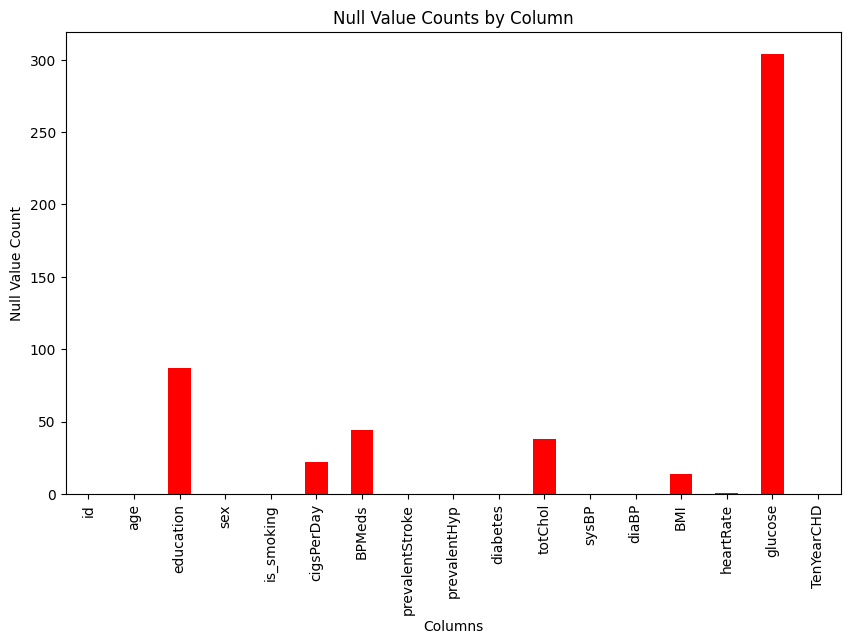

In [353]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
missing_values_count.plot(kind='bar', color='red')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

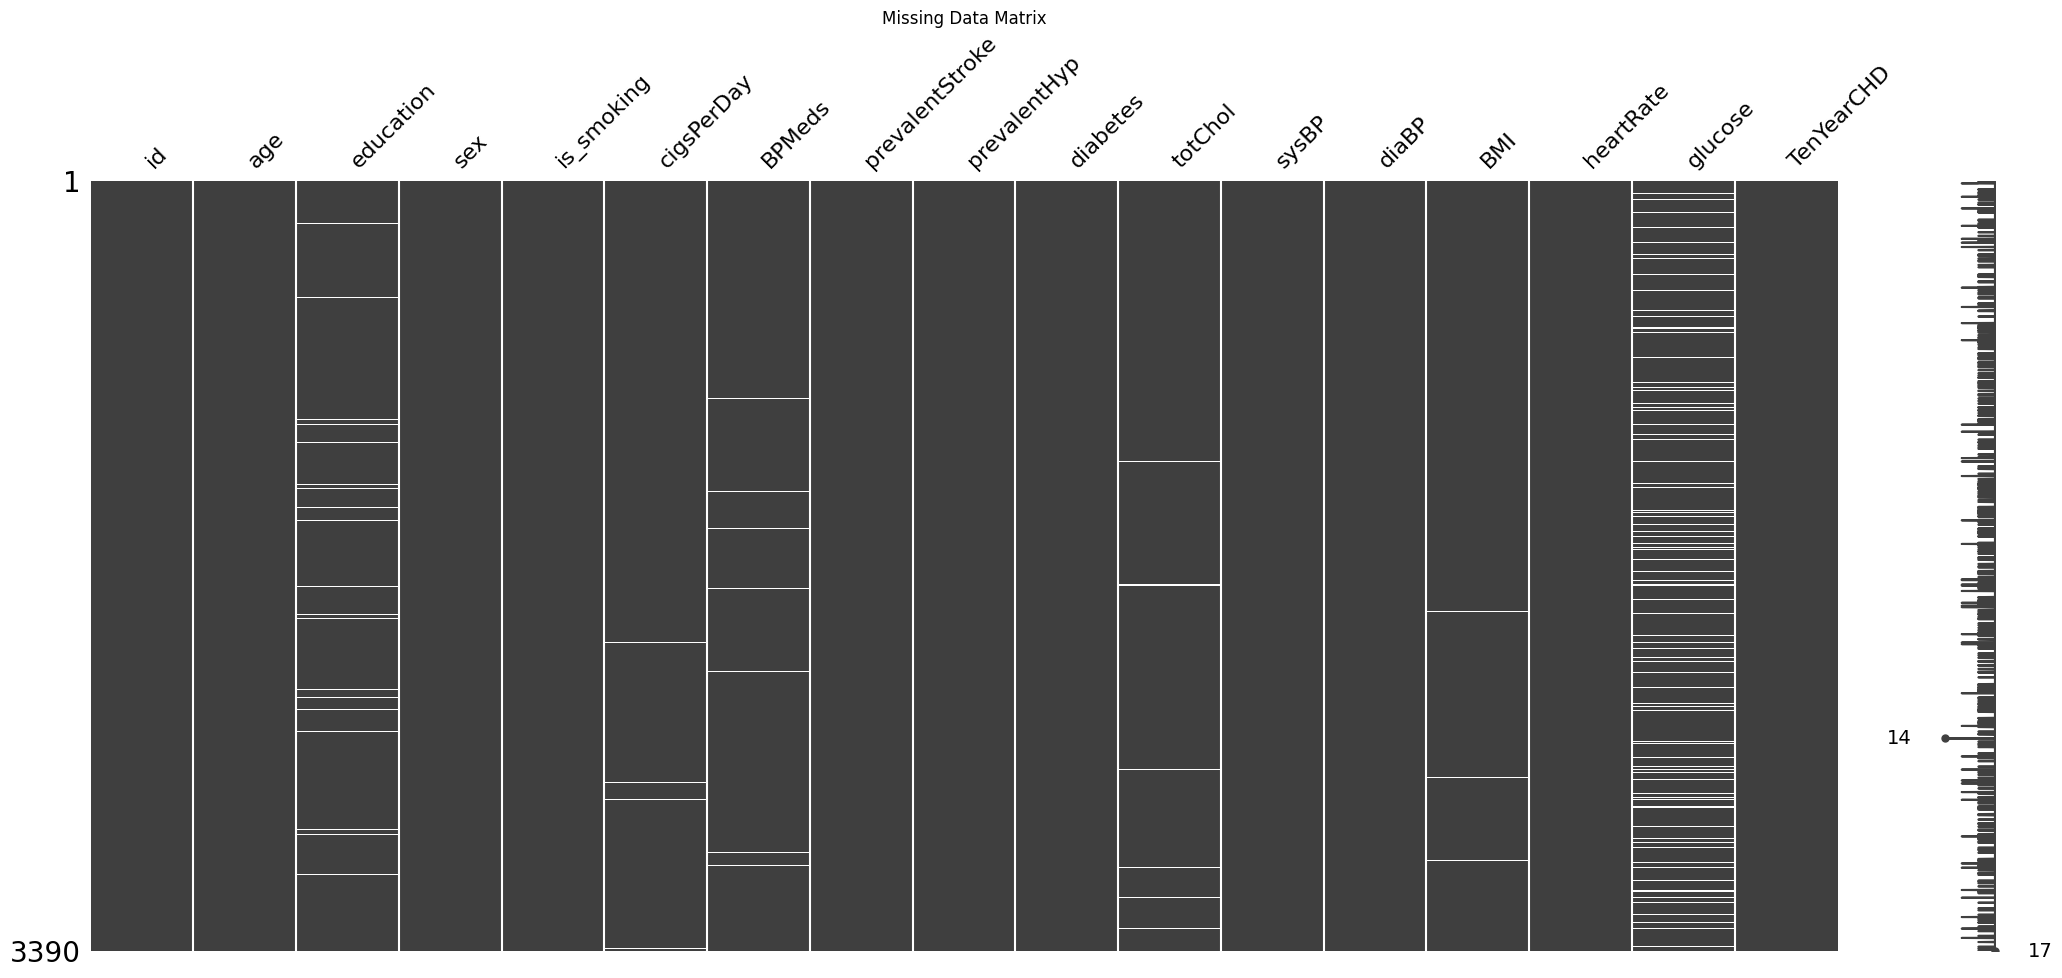

In [354]:
# Visualizing the missing values

msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

### What did you know about your dataset?

There are several insights that can be gathered from the information provided about your dataset:

1. **Number of Entries:**
   - The dataset contains 3,390 entries.

2. **Columns and Data Types:**
   - There are 17 columns in the dataset.
   - The data types include integers (`int64`), floats (`float64`), and objects (`object`).

3. **Missing Values:**
   - Some columns have missing values (non-null counts are less than the total number of entries).
   - Columns with missing values include 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.

4. **Categorical Columns:**
   - 'sex' and 'is_smoking' are categorical columns represented as objects. You may want to check the unique values in these columns and potentially convert them to numerical values if needed.

5. **Numerical Columns:**
   - Columns such as 'age', 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' are numerical.

6. **Target Variable:**
   - 'TenYearCHD' is the target variable for binary classification, indicating whether a patient is at risk of CHD in the next 10 years.

7. **Summary Statistics:**
   - Descriptive statistics such as mean, standard deviation, minimum, and maximum are not provided, but calculating these would be useful for understanding the distribution of numerical features.

8. **Potential Preprocessing Steps:**
   - Imputation: Consider imputing missing values for columns like 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.
   - Categorical Encoding: Convert categorical columns ('sex' and 'is_smoking') into numerical format, possibly using one-hot encoding or label encoding.
   - Feature Scaling: Depending on the algorithms you plan to use, consider scaling numerical features.

These initial insights provide a foundation for further exploration and preprocessing of the dataset. You can visualize the distribution of numerical features, explore relationships between variables, and handle missing values before building and training your machine learning model.

## ***2. Understanding Your Variables***

In [355]:
# Assuming data_raw is your DataFrame
columns_list = df.columns

# Print the list of columns
print("Dataset Columns:")
print(columns_list)

Dataset Columns:
Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [356]:
# Dataset Describe
df.describe(include="all")

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description

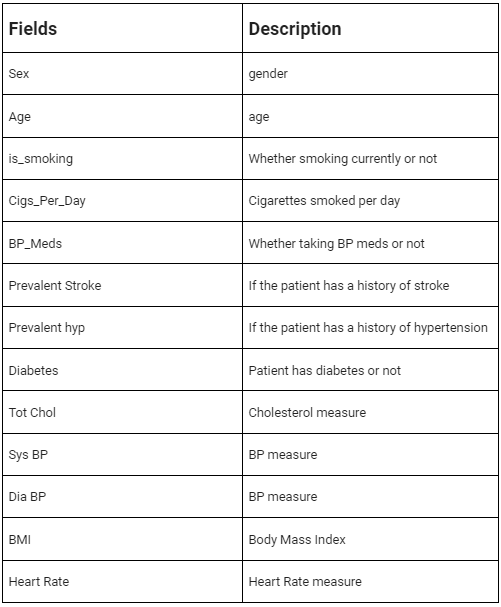

### Check Unique Values for each variable.

In [357]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column "{column}":')
    print(unique_values)
    print('\n')

Unique values in column "id":
[   0    1    2 ... 3387 3388 3389]


Unique values in column "age":
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


Unique values in column "education":
[ 2.  4.  1.  3. nan]


Unique values in column "sex":
['F' 'M']


Unique values in column "is_smoking":
['YES' 'NO']


Unique values in column "cigsPerDay":
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


Unique values in column "BPMeds":
[ 0. nan  1.]


Unique values in column "prevalentStroke":
[0 1]


Unique values in column "prevalentHyp":
[0 1]


Unique values in column "diabetes":
[0 1]


Unique values in column "totChol":
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 

## 3. ***Data Wrangling***

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [359]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

### Feature Manipulation

In [360]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [361]:
#Creating new feature Hypertension
df['Hypertension'] = df.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)

In [362]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

In [363]:
#Creating new feature Diabetes
df['Diabetes_grade'] = df['glucose'].apply(lambda x: diabetes_grade(x))

In [364]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df["mean_art_pressure"] = (df["sysBP"] + 2 * df["diaBP"])/3

In [365]:
# remove not useful columns
df.drop(columns=['id','sysBP', 'diaBP', 'glucose'], inplace=True)

In [366]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,TenYearCHD,Hypertension,Diabetes_grade,mean_art_pressure
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,NaN,90.0,1,2,1,106.000000
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,29.77,72.0,0,5,1,121.333333
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,20.35,88.0,0,1,1,86.000000
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,28.26,68.0,1,3,1,111.333333
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,26.42,70.0,0,2,1,102.166667


In [367]:
df.isna().sum()

age                   0
education            87
sex                   0
is_smoking            0
cigsPerDay           22
BPMeds               44
prevalentStroke       0
prevalentHyp          0
diabetes              0
totChol              38
BMI                  14
heartRate             1
TenYearCHD            0
Hypertension          0
Diabetes_grade        0
mean_art_pressure     0
dtype: int64

### What all manipulations have you done and insights you found?

Right now i just drop the ID column as it is not relevant in predicting the 'TenyearCHD'

created 3 lists containing the column names which will be helpful for further manipulation.

### Missing Value Imputation

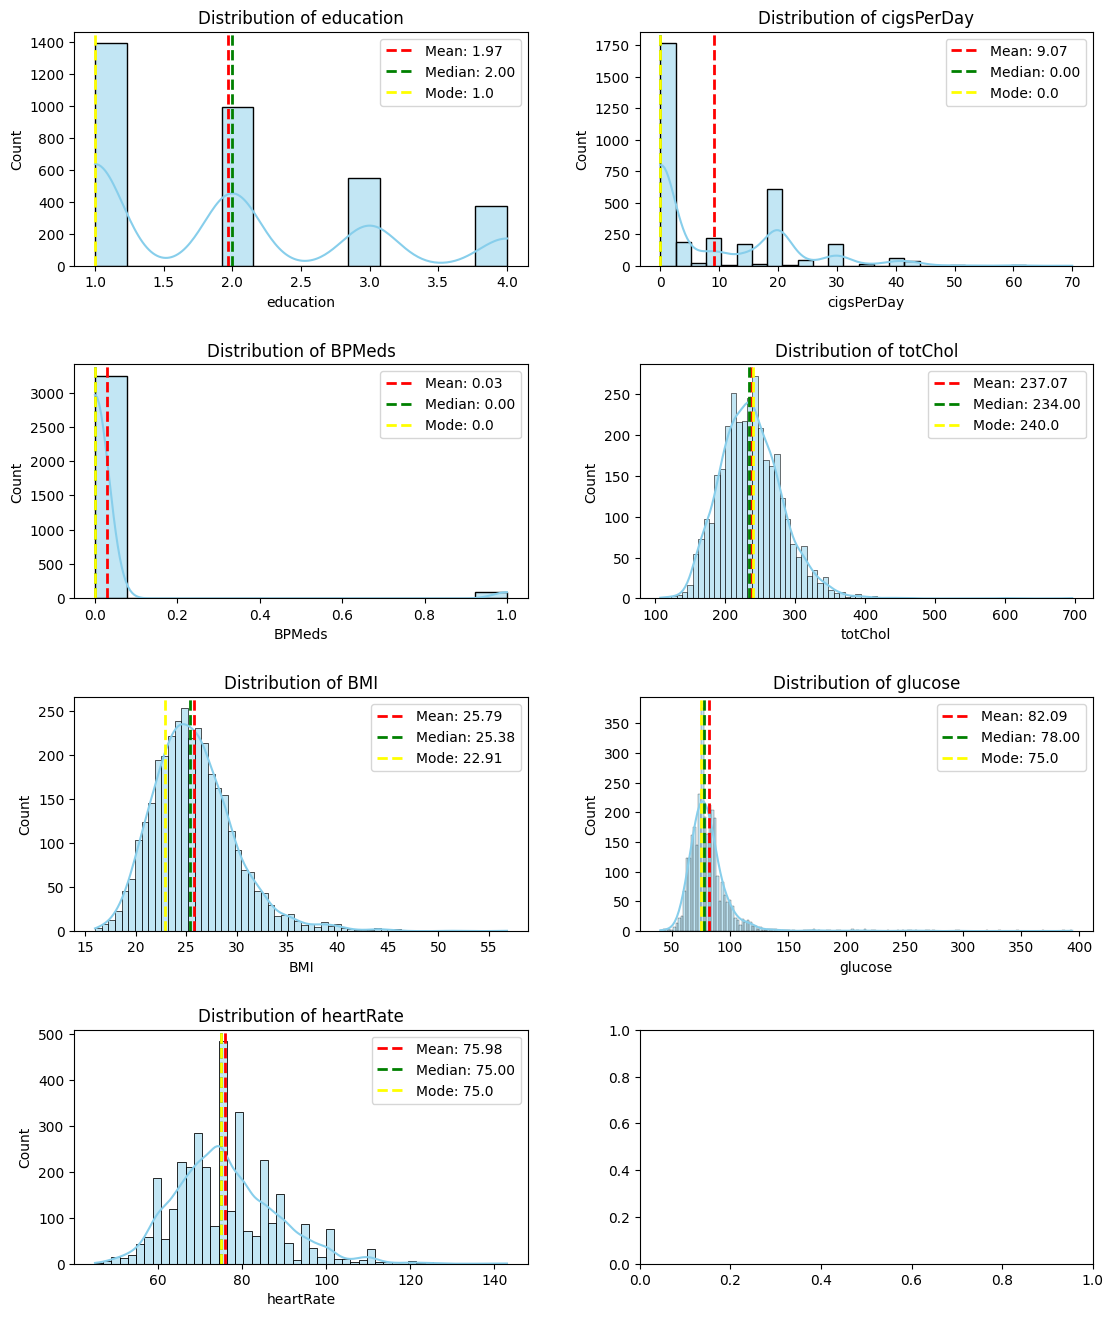

In [368]:
# List of columns to plot
columns_to_plot = ['education','cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose', 'heartRate']

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
fig.tight_layout(pad=5.0)

# Check if there are enough subplots for the columns to plot
if len(columns_to_plot) > len(axes.flatten()):
    raise ValueError("Not enough subplots for the number of columns to plot.")

for i, column in enumerate(columns_to_plot):
    # Plot distribution
    sns.histplot(data_raw[column], kde=True, ax=axes[i // 2, i % 2], color='skyblue')

    # Annotate with mean, median, mode
    mean_value = data_raw[column].mean()
    median_value = data_raw[column].median()
    mode_value = data_raw[column].mode().values[0]

    axes[i // 2, i % 2].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[i // 2, i % 2].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[i // 2, i % 2].axvline(mode_value, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')

    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')

plt.show()

In [369]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,TenYearCHD,Hypertension,Diabetes_grade,mean_art_pressure
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,NaN,90.0,1,2,1,106.000000
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,29.77,72.0,0,5,1,121.333333
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,20.35,88.0,0,1,1,86.000000
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,28.26,68.0,1,3,1,111.333333
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,26.42,70.0,0,2,1,102.166667


In [370]:
import pandas as pd

def handle_outliers_iqr(df, cols=None, threshold=1.5):
    if cols is None:
        cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + threshold * iqr
        lower_bound = q1 - threshold * iqr
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

# Columns to exclude from outlier detection
exclude_cols = ['sex', 'is_smoking','TenYearCHD']

# Get numerical columns except for excluded columns
numeric_cols = [col for col in df.columns if col not in exclude_cols]

# Apply outlier detection
df_processed = handle_outliers_iqr(df, cols=numeric_cols)

# Display the processed DataFrame
print(df_processed)


      age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0      64        2.0   F        YES         3.0     0.0              0.0   
1      36        4.0   M         NO         0.0     0.0              0.0   
2      46        1.0   F        YES        10.0     0.0              0.0   
3      50        1.0   M        YES        20.0     0.0              0.0   
4      64        1.0   F        YES        30.0     0.0              0.0   
...   ...        ...  ..        ...         ...     ...              ...   
3385   60        1.0   F         NO         0.0     0.0              0.0   
3386   46        1.0   F         NO         0.0     0.0              0.0   
3387   44        3.0   M        YES         3.0     0.0              0.0   
3388   60        1.0   M         NO         0.0     NaN              0.0   
3389   54        3.0   F         NO         0.0     0.0              0.0   

      prevalentHyp  diabetes  totChol    BMI  heartRate  TenYearCHD  \
0               

In [371]:
df_processed.shape

(3390, 16)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Box Plot of Systolic/Diastolic Blood Pressure by TenYearCHD Status

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Set the color palette
colors = ["#3498db", "#e74c3c"]

# Box plot for Systolic Blood Pressure (sysBP) - Training dataset
plt.figure(figsize=(10, 3))
sns.boxplot(x=y_train, y='sysBP', data=X_train_transformed_df, palette=colors)
plt.title('Box Plot of Systolic Blood Pressure by TenYearCHD Status (Training)', fontsize=16)
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)', fontsize=14)
plt.ylabel('Systolic Blood Pressure (sysBP)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Box plot for Diastolic Blood Pressure (diaBP) - Training dataset
plt.figure(figsize=(10, 3))
sns.boxplot(x=y_train, y='diaBP', data=X_train_transformed_df, palette=colors)
plt.title('Box Plot of Diastolic Blood Pressure by TenYearCHD Status (Training)', fontsize=16)
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)', fontsize=14)
plt.ylabel('Diastolic Blood Pressure (diaBP)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Box plot for Systolic Blood Pressure (sysBP) - Testing dataset
plt.figure(figsize=(10, 3))
sns.boxplot(x=y_test , y='sysBP', data=X_test_transformed_df, palette=colors)
plt.title('Box Plot of Systolic Blood Pressure by TenYearCHD Status (Testing)', fontsize=16)
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)', fontsize=14)
plt.ylabel('Systolic Blood Pressure (sysBP)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Box plot for Diastolic Blood Pressure (diaBP) - Testing dataset
plt.figure(figsize=(10, 3))
sns.boxplot(x=y_test , y='diaBP', data=X_test_transformed_df, palette=colors)
plt.title('Box Plot of Diastolic Blood Pressure by TenYearCHD Status (Testing)', fontsize=16)
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)', fontsize=14)
plt.ylabel('Diastolic Blood Pressure (diaBP)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Set the color palette
colors = ["#3498db", "#e74c3c"]

# Box plot for Systolic Blood Pressure (sysBP)
plt.figure(figsize=(10, 3))
sns.boxplot(x='TenYearCHD', y='sysBP', data=df, palette=colors)
plt.title('Box Plot of Systolic Blood Pressure by TenYearCHD Status', fontsize=16)
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)', fontsize=14)
plt.ylabel('Systolic Blood Pressure (sysBP)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Box plot for Diastolic Blood Pressure (diaBP)
plt.figure(figsize=(10, 3))
sns.boxplot(x='TenYearCHD', y='diaBP', data=df, palette=colors)
plt.title('Box Plot of Diastolic Blood Pressure by TenYearCHD Status', fontsize=16)
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)', fontsize=14)
plt.ylabel('Diastolic Blood Pressure (diaBP)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The box plot was chosen for its ability to effectively display the distribution of blood pressure measurements for patients with and without CHD risk. Its simplicity, along with clear representation of central tendency and variability, makes it suitable for comparing groups and identifying potential differences in blood pressure levels.

##### 2. What is/are the insight(s) found from the chart?

It is clearly visible the High systolic and Diastolic blood pressure for the person having Ten Year CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from comparing blood pressure measurements between patients with and without CHD risk can help in creating positive business impact by informing healthcare interventions and personalized treatment plans, potentially reducing the incidence of cardiovascular diseases. However, if significant disparities in blood pressure levels exist, it may highlight disparities in access to healthcare, leading to negative growth.

#### Chart - 2 side-by-side comparison of the distribution of total cholesterol levels for patients

In [ ]:
# Chart - 2 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['totChol'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Cholesterol for No CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['totChol'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Cholesterol for CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen for its effectiveness in displaying the distribution of total cholesterol levels for patients with and without CHD. Its simplicity and ability to show frequency distributions make it suitable for comparing data between groups and identifying potential patterns or differences.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that individuals with CHD tend to have a higher frequency of total cholesterol levels in the range of 200 to 300 compared to those without CHD. Additionally, there are outliers with total cholesterol levels exceeding 400, suggesting potential extreme cases or outliers within the CHD group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained regarding the association between total cholesterol levels and CHD risk can contribute to positive business impact by informing preventive healthcare strategies, personalized treatment plans, and interventions aimed at reducing CHD incidence, thus potentially improving patient outcomes and reducing healthcare costs.

#### Chart - 3 "Comparison of BMI Distribution between Patients with and without CHD"

In [ ]:
# Chart - 3 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['BMI'], bins=30, kde=True, color='blue')
plt.title('Distribution of BMI for No CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['BMI'], bins=30, kde=True, color='red')
plt.title('Distribution of BMI for CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.The histogram was chosen because it effectively visualizes the distribution of BMI (Body Mass Index) for patients with and without CHD. Its simplicity and ability to show frequency distributions make it suitable for comparing BMI between groups and identifying potential associations with CHD risk.

##### 2. What is/are the insight(s) found from the chart?

Not a big difference in BMI distribution, there is few outlier in BMI OF CHD person.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights on the BMI distribution may not significantly impact business positively, but identifying outliers in BMI among CHD patients can inform targeted interventions, potentially reducing adverse health outcomes and healthcare costs.

#### Chart - 4 "Comparison of Heart Rate between Patients with and without CHD"

In [ ]:
# Chart - 4 visualization code
# Set up the figure with subplots
plt.figure(figsize=(10, 6))

# Box plot for heart rates based on CHD status
sns.boxplot(x='TenYearCHD', y='heartRate', data=df)
plt.title('Heart Rate Comparison for Different CHD Status')
plt.xlabel('TenYearCHD')
plt.ylabel('Heart Rate')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The box plot was selected because it effectively compares the distribution of heart rates between patients with and without CHD. Its ability to show the central tendency, spread, and any potential outliers in the data makes it suitable for comparing continuous variables across different groups.

##### 2. What is/are the insight(s) found from the chart?

No big difference in Heart rate of patient with or without CHD , but If your heart rate is over 100 beats per minute when you are at rest, this is considered fast. A rapid heart rate, also known as tachycardia, can be related to many different health conditions. It's normal for your heart rate to increase when you're exercising or if your body is fighting off an infection.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights on heart rate differences between CHD and non-CHD patients may not directly impact business positively. However, identifying elevated heart rates (>100 bpm) among individuals can prompt targeted healthcare interventions, potentially mitigating health risks and reducing healthcare costs. Failure to address elevated heart rates may lead to negative health outcomes, impacting business productivity and healthcare expenses.

#### Chart - 5 Comparison of Glucose Distribution between Patients with and without CHD

In [ ]:
# Chart - 5 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['glucose'], bins=30, kde=True, color='blue')
plt.title('Distribution of Glucose for No CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['glucose'], bins=30, kde=True, color='red')
plt.title('Distribution of Glucose for CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen because it effectively displays the distribution of glucose levels for patients with and without CHD. Its simplicity and ability to show frequency distributions make it suitable for comparing glucose levels between groups and identifying potential associations with CHD risk.

##### 2. What is/are the insight(s) found from the chart?

No significant change is visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer HereInsights into glucose level distributions may aid in creating positive business impact by informing preventive healthcare measures and personalized interventions, potentially reducing the risk of CHD and associated healthcare costs. However, if significant disparities or abnormalities in glucose levels exist, they could indicate underlying health issues, leading to negative growth due to increased healthcare expenses and decreased productivity.

#### Chart - 6 - "Prevalence of Hypertension Across Age Groups"

In [ ]:
# Chart - 6 visualization code
# Set up the figure with subplots
plt.figure(figsize=(14, 6))

# Plot the prevalence of hypertension for different age groups
sns.countplot(x='age', hue='prevalentHyp', data=df, palette='viridis')
plt.title("Prevalence of Hypertension Across Age Groups")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Prevalent Hypertension')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

The countplot was chosen because it effectively displays the prevalence of hypertension across different age groups, making it easy to observe trends and variations in hypertension counts among patients with and without CHD. Its simplicity and ability to show categorical data with hue differentiation make it suitable for comparing hypertension prevalence across age groups.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart indicate that the prevalence of hypertension varies across different age groups, with notable differences between patients with and without CHD. For patients without CHD, hypertension counts peak around age 40 and then decline, while for those with CHD, hypertension counts continue to rise until around age 63 before declining. This suggests potential age-related trends in hypertension prevalence among patients with and without CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights on hypertension prevalence across age groups can positively impact businesses by informing targeted healthcare interventions and preventive measures, potentially reducing the incidence of cardiovascular diseases like CHD and associated healthcare costs. However, if hypertension prevalence remains high or increases with age, it may lead to negative growth due to elevated healthcare expenses and decreased workforce productivity associated with managing hypertension-related complications.

#### Chart - 7 -- Prevalence of Diabetes for Different Age Groups

In [ ]:
# Chart - 7 visualization code
# Set up the figure with subplots
plt.figure(figsize=(14, 6))
# Plot the prevalence of diabetes for different age groups
sns.countplot(x='age', hue='diabetes', data=df, palette='muted')
plt.title('Prevalence of Diabetes for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot because it effectively displays the prevalence of diabetes across different age groups using categorical data.

##### 2. What is/are the insight(s) found from the chart?

From the chart, it appears that there may be a higher prevalence of diabetes among individuals without coronary heart disease (CHD) compared to those with CHD, as indicated by the taller towers in the "No CHD" category compared to the "CHD" category. This insight suggests a potential correlation between diabetes and the absence of coronary heart disease, which could be further explored for implications in preventive healthcare and treatment strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights regarding the higher prevalence of diabetes among individuals without coronary heart disease could potentially lead to positive business impacts in healthcare, informing targeted prevention and management strategies. However, misinterpretation or inadequate contextualization of the insights could lead to negative growth implications, such as misguided treatment approaches or misallocation of resources.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# Plot the distribution of education levels
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, palette='Set2')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot to visualize the distribution of education levels because it effectively displays the frequency of each category within a single categorical variable. This allows for easy comparison of the education levels present in the dataset, providing insight into the educational demographics of the population.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart suggests that there are higher numbers of individuals with education level 1.0 compared to those with education levels 2.0, 3.0, and 4.0. This indicates that the majority of the population in the dataset likely has education level 1.0, followed by decreasing numbers for higher education levels. This insight can be useful for understanding the educational distribution within the dataset and potentially identifying any patterns or disparities in educational attainment among the population.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that education level 1.0 has higher numbers than 2.0, 3.0, and 4.0 could potentially lead to positive business impacts by informing targeted marketing or educational campaigns tailored to individuals with varying education levels. However, if the distribution of education levels is skewed due to biases in the dataset or if it does not accurately represent the target market, it could lead to negative growth implications by misguiding business decisions or resource allocations. Therefore, it's important to validate the insights and consider other relevant factors before implementing any strategies based on them.

#### Chart - 9 - Relationship between TenYearCHD and continous variable

In [ ]:
# Chart - 9 visualization code
# Relationship between the dependent variable and continuous independent variables with the help of catplot named violinplot
for i in continuous_var:
    sns.violinplot(data=df, x="TenYearCHD", y=i, hue="sex", split=True, inner="quart")
    plt.title(f'Relationship between TenYearCHD and {i}')
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

I chose a violin plot to visualize the relationship between the dependent variable (TenYearCHD) and continuous independent variables because it effectively displays the distribution of the continuous variable across different categories of the dependent variable. The split violin plot also allows for easy comparison between categories, while the addition of hue (sex) provides further insights into potential gender differences within the data. Overall, the violin plot offers a comprehensive view of the relationship between TenYearCHD and each continuous independent variable, aiding in understanding the data's patterns and distributions.

##### 2. What is/are the insight(s) found from the chart?

Vatious distrubution pattern has been seen for men an women having chd and also do not have chd , some amazing pattern are visible here.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the violin plots could potentially lead to positive business impacts by providing valuable information about the relationship between the risk of coronary heart disease (TenYearCHD) and various continuous independent variables, such as age, cholesterol levels, or blood pressure. These insights can inform the development of targeted prevention and intervention strategies, potentially leading to improved healthcare outcomes and reduced risks for individuals at higher risk of CHD.

However, if the insights reveal concerning patterns, such as a strong association between certain continuous variables and a higher risk of CHD, it could lead to negative growth implications. For instance, if the plots show that individuals with elevated cholesterol levels or blood pressure have a significantly higher risk of CHD, it could indicate a need for more intensive interventions or treatments for these individuals. Failure to address these risks adequately could lead to negative health outcomes and increased healthcare costs in the long run. Therefore, it's crucial to carefully analyze the insights and implement appropriate measures to mitigate any negative impacts.

#### Chart - 10 - % of patients at the risk of CHD by: each variable

In [ ]:
# Chart - 10 visualization code
# 100% stacked bar chart

# Calculate the number of rows needed based on the number of categorical variables
num_rows = (len(categorical_var) - 1) // 3 + 1

# Create subplots with 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over categorical variables
for i, ax in zip(categorical_var[:-1], axes):
    x_var, y_var = i, dependent_var[0]

    # Calculate percentage and create 100% stacked bar chart
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var) * 100
    df_grouped.plot.barh(stacked=True, ax=ax)

    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var
    )

    ax.set_title("% of patients at the risk of CHD by: " + i)

    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                ax.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
# Hide any empty subplots
for j in range(len(categorical_var), len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap and show plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a 100% stacked bar chart because it effectively illustrates the percentage distribution of individuals at risk of coronary heart disease across different categories of multiple categorical variables. This type of chart allows for easy comparison of the proportions within each category while maintaining the overall proportionality to 100%.

##### 2. What is/are the insight(s) found from the chart?

The insights from the 100% stacked bar chart would reveal the distribution of individuals at risk of coronary heart disease across various categories of categorical variables. For each categorical variable, the chart displays the percentage of individuals at risk of CHD within each category. Insights could include identifying categories with higher or lower proportions of individuals at risk, understanding the relative risk across different demographic or lifestyle factors, and potentially identifying patterns or trends that could inform targeted interventions or preventive measures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the 100% stacked bar chart can help create a positive business impact by informing targeted interventions and preventive measures to reduce the risk of coronary heart disease. However, if the insights reveal disproportionately high risks within certain demographic or lifestyle categories, it could lead to negative growth if not addressed effectively, potentially resulting in increased healthcare costs or adverse health outcomes.

#### Chart - 11 - distribution of categorical variable

In [ ]:
# Chart - 11 visualization code
# Analysing the distribution of categorical variables in the dataset
import math

# Calculate the number of rows needed based on the number of categorical variables
num_vars = len(categorical_var)
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5 * num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through categorical variables
for i, cat_var in enumerate(categorical_var):
    plt.sca(axes[i])
    p = sns.countplot(x=cat_var, data=df)
    plt.xlabel(cat_var)
    plt.title(cat_var + ' distribution')

    # Annotate each bar with the count
    for bar in p.patches:
        plt.annotate(f'{bar.get_height()}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Hide any empty subplots
for j in range(len(categorical_var), len(axes)):
    axes[j].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot to analyze the distribution of categorical variables because it provides a clear visual representation of the frequency of each category within the dataset. This type of chart is effective for comparing the distribution of different categories across multiple variables, allowing for easy identification of patterns or disparities within the data. Additionally, annotating each bar with the count provides additional context and clarity to the visualization.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart highlight the imbalanced distribution of categorical variables, particularly in Bpmeds, Prevalentstroke, Prevalenthyp, diabetes, and the target variable TenYearCHD. This suggests that certain categories within these variables may be underrepresented or overrepresented compared to others, potentially impacting the robustness of predictive models and requiring careful consideration during analysis and model development.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from identifying imbalanced distributions in categorical variables can help create a positive business impact by informing strategies to address data imbalance and improve the performance of predictive models. However, if not properly addressed, imbalanced data can lead to negative growth by causing biased model predictions, reduced model accuracy, and potentially overlooking minority classes or important patterns within the data. Therefore, it's essential to implement appropriate techniques such as oversampling, undersampling, or using advanced algorithms designed to handle imbalanced data to mitigate these negative impacts and ensure the reliability of the predictive models.

#### Chart - 12 - Distribution of continous variable

In [ ]:
# Chart - 12 visualization code
# Visualizing code of histogram plot & boxplot for each column to know the data distribution
for col in df.describe().columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    # Histogram with mean and median lines
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[0].axvline(df[col].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    axes[0].legend()

    # Boxplot with mean line
    sns.boxplot(df[col], ax=axes[1], orient='h', showmeans=True, color='cyan')

    fig.suptitle("Distribution plot of " + col, fontsize=15)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

I chose to create a combination of histogram plots and boxplots for each column because this allows for a comprehensive visualization of the data distribution. The histogram provides insights into the shape and spread of the distribution, while the boxplot offers additional information on central tendency, variability, and potential outliers. By displaying both plots side by side, we can gain a more complete understanding of the distribution characteristics of each column in the dataset. Additionally, adding mean and median lines to the histogram provides further context on central tendency, aiding in interpretation. Overall, this combination of plots facilitates a deeper exploration of the dataset's numerical features.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart reveal the presence of outliers in the data, as indicated by data points extending beyond the whiskers of the boxplot. Additionally, the combination of histogram and boxplot visualizations highlights potential data imbalances and anomalies in the dataset's distribution, aiding in the identification of skewed or asymmetrical distributions and irregularities in central tendency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from identifying outliers and anomalies in the data can help create a positive business impact by informing data cleansing and preprocessing strategies to improve the quality and reliability of analytical models. However, if not properly addressed, these insights could lead to negative growth by compromising the accuracy and effectiveness of predictive models, resulting in biased or misleading conclusions that may adversely affect business decisions or outcomes. Therefore, addressing outliers and anomalies through appropriate data preprocessing techniques is crucial to ensure the reliability and effectiveness of subsequent analyses and business decisions.

#### Chart - 13 - Distribution Plot

In [ ]:
# Visualizing distributions using Histograms:
df.hist(figsize=(15, 15), grid=True);

##### 1. Why did you pick the specific chart?

I chose histograms for visualizing distributions because they provide a clear representation of the frequency distribution of numerical variables in the dataset. By plotting histograms for each numerical variable, we can quickly assess the shape, spread, and central tendency of the data, as well as identify any potential outliers or patterns within each variable. The use of histograms allows for a comprehensive exploration of the dataset's numerical characteristics in a single visualization, aiding in data exploration and understanding.

##### 2. What is/are the insight(s) found from the chart?

The insight from the histograms reveals that many of the numerical variables in the dataset exhibit skewness, indicating that their distributions are not symmetrical. Additionally, the presence of data imbalances suggests that certain values or ranges are more prevalent than others within these variables. These observations are important for understanding the characteristics of the dataset and may warrant further investigation into the underlying reasons for the skewness and imbalances, as well as consideration of appropriate data preprocessing techniques before conducting further analysis or modeling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from identifying skewness and data imbalance in the dataset can potentially lead to positive business impacts by informing data preprocessing strategies to improve the accuracy and reliability of analytical models. However, if not properly addressed, these insights could lead to negative growth by compromising the effectiveness of predictive models, resulting in biased or inaccurate predictions that may adversely affect business decisions or outcomes. Therefore, addressing skewness and data imbalance through appropriate preprocessing techniques is crucial to ensure the reliability and effectiveness of subsequent analyses and business decisions.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float', 'int']).columns

# Display non-numeric columns
print("Non-numeric columns:", non_numeric_columns)

# Handle non-numeric data
# For example, you can drop non-numeric columns
df_numeric = df.drop(columns=non_numeric_columns)

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a heatmap of the correlation matrix because it effectively visualizes the relationships between numeric variables in the dataset. This allows for easy identification of patterns and strengths of correlations between different features, providing valuable insights into potential multicollinearity or dependencies among variables. The heatmap with annotated correlation values enhances readability and facilitates quick interpretation of the relationships within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insight from the correlation matrix heatmap indicates that there is significant correlation between the variables sysbp, diabp, and prevalenthyp. Specifically, sysbp and diabp exhibit a high correlation with each other, suggesting a strong linear relationship between systolic and diastolic blood pressure measurements. Additionally, both sysbp and diabp show a high correlation with the variable prevalenthyp, indicating a potential association between hypertension prevalence and blood pressure levels. This insight highlights the interrelatedness of these variables within the dataset, which could be important for understanding cardiovascular health and informing healthcare interventions or risk assessment strategies.

#### Chart - 15 - Pair Plot

In [ ]:
# Assuming df is your dataset and 'TenYearCHD' is the dependent feature
# Replace 'feature1', 'feature2', 'feature3' with your actual independent feature names
independent_features = ['age', 'education', 'cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']
dependent_feature = 'TenYearCHD'

# Create scatter plots using a for loop
for feature in independent_features:
    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature][df[dependent_feature] == 0], df[dependent_feature][df[dependent_feature] == 0], label='No CHD', marker='o')
    plt.scatter(df[feature][df[dependent_feature] == 1], df[dependent_feature][df[dependent_feature] == 1], label='CHD', marker='s')

    # Set labels and title
    plt.xlabel(feature)
    plt.ylabel(dependent_feature)
    plt.title(f'Scatter Plot between {feature} and {dependent_feature}')
    plt.legend()

    # Show the plot
    plt.show()


##### 1. Why did you pick the specific chart?

I chose scatter plots to visualize the relationship between each independent feature and the dependent feature (TenYearCHD) because scatter plots are effective for examining the relationship between two continuous variables. By plotting the values of each independent feature against the dependent feature, we can visually assess any potential patterns, trends, or associations between them. Additionally, using different markers for the two classes (CHD and No CHD) allows for easy differentiation and interpretation of the data points. Overall, scatter plots provide a clear and intuitive way to explore the relationship between independent and dependent variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insights from the scatter plots reveal potential linear separability between the two classes (CHD and No CHD) for some independent features. Specifically, the straight lines formed by the data points suggest that certain independent features may serve as effective classifiers for distinguishing between individuals with and without coronary heart disease (CHD). This observation implies that these features may have significant predictive power in identifying individuals at risk of CHD, which could be valuable for risk assessment and decision-making in healthcare settings.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The mean cholesterol levels (totChol) are the same for smokers and non-smokers.

Alternative Hypothesis (H1): There is a significant difference in mean cholesterol levels between smokers and non-smokers.

#### 2. Perform an appropriate statistical test.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate data for smokers and non-smokers
smokers = df[df['is_smoking'] == 'YES']['totChol']
non_smokers = df[df['is_smoking'] == 'NO']['totChol']

# Perform t-test
t_statistic, p_value = ttest_ind(smokers, non_smokers, equal_var=False)

# Set your significance level (e.g., 0.05)
alpha = 0.05

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean cholesterol levels.")
else:
    print("Fail to reject the null hypothesis. No significant difference in mean cholesterol levels.")


##### Which statistical test have you done to obtain P-Value?

I used an independent two-sample t-test (ttest_ind) from the scipy.stats module to obtain the p-value. The t-test was applied to compare the mean cholesterol levels between two groups: smokers and non-smokers.

##### Why did you choose the specific statistical test?

I chose the independent two-sample t-test because it is appropriate when comparing the means of two independent groups, which is the case in your hypothesis. Here's the rationale:

1. **Nature of the Comparison:**
   - Your hypothesis involves comparing the mean cholesterol levels between two independent groups: smokers and non-smokers.

2. **Parametric Test:**
   - The t-test is a parametric test suitable for comparing means of continuous variables when certain assumptions are met. It assumes that the data follow a normal distribution and that the variances of the two groups are either equal or not significantly different.

3. **Continuous Outcome Variable:**
   - Cholesterol levels are continuous numerical data, making the t-test appropriate for comparing means.

4. **Two Independent Groups:**
   - The independent two-sample t-test is specifically designed for comparing means when dealing with two independent groups.

5. **Equal Variance Assumption:**
   - By setting `equal_var=False` in the `ttest_ind` function, the test is performed under the assumption of unequal variances between the two groups, which is a more robust choice when the variances are not assumed to be equal.

It's important to note that the appropriateness of a statistical test depends on the characteristics of your data and the assumptions of the test. In some cases, alternative tests (such as non-parametric tests) might be considered if assumptions are not met. Always ensure that the chosen statistical test aligns with the nature of your data and the objectives of your analysis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): Age has no effect on the incidence of diabetes.

Alternative Hypothesis (H1): There is a significant association between age and the incidence of diabetes.

#### 2. Perform an appropriate statistical test.

In [ ]:
import statsmodels.api as sm
import pandas as pd


# Prepare the logistic regression model
X = df[['age']]
y = df['diabetes']
X = sm.add_constant(X)  # Add a constant term for the intercept

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary statistics
print(result.summary())

# Check if the p-value for 'age' is less than the significance level
if result.pvalues['age'] < 0.05:
    print("Reject the null hypothesis. There is a significant association between age and the incidence of diabetes.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between age and the incidence of diabetes.")

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the likelihood-ratio test associated with logistic regression. The logistic regression model is fitted using the Maximum Likelihood Estimation (MLE) method, and the likelihood-ratio test is used to assess the significance of the predictor variable 'age' in predicting the binary outcome 'diabetes.'

##### Why did you choose the specific statistical test?

I chose logistic regression for this analysis because the outcome variable, 'diabetes,' is binary (0 for no diabetes, 1 for diabetes), making it suitable for logistic regression, a type of regression analysis designed for binary outcomes. Here are the reasons for choosing logistic regression:

1. **Nature of the Outcome Variable:**
   - Logistic regression is appropriate for binary outcomes or outcomes that can be dichotomized. In this case, 'diabetes' is binary, making logistic regression a suitable choice.

2. **Log-Odds Transformation:**
   - Logistic regression models the log-odds of the probability of an event occurring. This is advantageous for binary outcomes as it allows the modeling of the relationship between predictors (in this case, 'age') and the likelihood of the event (diabetes) occurring.

3. **Handling Non-Linearity:**
   - Logistic regression can capture non-linear relationships between predictor variables and the log-odds of the outcome, providing flexibility in modeling complex relationships.

4. **Likelihood-Ratio Test:**
   - Logistic regression provides statistical tests, such as the likelihood-ratio test, for assessing the significance of predictor variables. This allows us to test hypotheses about the association between 'age' and 'diabetes.'

5. **Interpretability:**
   - Logistic regression coefficients can be interpreted as log-odds ratios, providing insights into the direction and strength of the relationship between the predictor and the outcome.

6. **Model Fit:**
   - Logistic regression is widely used in epidemiology and medical research for modeling binary outcomes, making it a common and well-established approach for analyzing this type of data.

It's crucial to choose a statistical test that aligns with the nature of your data and the research question at hand. Logistic regression, in this context, is a suitable choice for investigating the association between 'age' and the likelihood of 'diabetes' occurrence.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
The mean age is the same for individuals with and without a 10-year risk of CHD.


Alternative Hypothesis (H1):
There is a significant difference in the mean age between individuals with and without a 10-year risk of CHD.

#### 2. Perform an appropriate statistical test.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming df is your DataFrame
# Drop any rows with missing values in 'TenYearCHD'
df_cleaned = df.dropna(subset=['TenYearCHD'])

# List to store results
test_results = []

# Numerical independent variables (excluding 'TenYearCHD')
numerical_variables = df_cleaned.select_dtypes(include='number').columns
numerical_variables = numerical_variables[numerical_variables != 'TenYearCHD']

# Significance level
alpha = 0.05

# Loop through each numerical independent variable
for variable in numerical_variables:
    # Split the data into two groups based on 'TenYearCHD'
    group_no_chd = df_cleaned[df_cleaned['TenYearCHD'] == 0][variable]
    group_chd = df_cleaned[df_cleaned['TenYearCHD'] == 1][variable]

    # Perform t-test
    t_statistic, p_value = ttest_ind(group_no_chd, group_chd)

    # Store results
    test_results.append({'Variable': variable, 'T-statistic': t_statistic, 'P-value': p_value})

    # Check for statistical significance
    if p_value < alpha:
        print(f"Reject the null hypothesis for {variable}. There is evidence that it is correlated with an increased risk of CHD.")
    else:
        print(f"Fail to reject the null hypothesis for {variable}. There is no significant evidence of a correlation between {variable} and CHD risk.")

# Convert results to DataFrame for easier inspection
results_df = pd.DataFrame(test_results)

# Display results
print(results_df)


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-values is the independent two-sample t-test. The t-test is applied to compare the means of two independent groups: individuals without a 10-year risk of Coronary Heart Disease (CHD) and individuals with a 10-year risk of CHD.

##### Why did you choose the specific statistical test?

The specific statistical test chosen in the provided code is the independent two-sample t-test. Here's why this test was chosen for comparing numerical independent variables between two groups:

1. **Nature of the Data:**
   - The data involves numerical independent variables, such as 'age,' and the comparison is between two groups: individuals with and without a 10-year risk of Coronary Heart Disease (CHD).

2. **Comparison of Means:**
   - The objective is to assess whether there is a significant difference in means between the two groups for each numerical variable.

3. **Two Independent Groups:**
   - The t-test is appropriate when comparing the means of two independent groups, which is the case here (individuals with and without a 10-year risk of CHD).

4. **Assumption of Normality:**
   - The t-test assumes that the data are approximately normally distributed. While robust to deviations from normality, the t-test is suitable when analyzing numerical data.

5. **Testing for Significance:**
   - The t-test provides a p-value that helps in testing the null hypothesis of equal means. If the p-value is below a chosen significance level (e.g., 0.05), it indicates that there is evidence to reject the null hypothesis.

6. **Ease of Interpretation:**
   - The results of the t-test are relatively easy to interpret, especially when assessing whether the means of two groups are statistically different.

While the t-test is a suitable choice for comparing means between two groups, it's important to consider the assumptions and limitations of the test. If the assumptions are not met or if dealing with non-numerical data, alternative tests might be considered. Always choose a statistical test that aligns with the nature of the data and the objectives of the analysis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [372]:
# Define the imputation transformer
missing_value = ColumnTransformer([('impute_education', SimpleImputer(strategy='median'),[1]),
                                                ('impute_cigsPerDay', SimpleImputer(strategy='mean'),[4]),
                                                 ('impute_BPMeds', SimpleImputer(strategy='median'),[5]),
                                                ('impute_totChol', SimpleImputer(strategy='mean'),[9]),
                                                 ('impute_BMI', SimpleImputer(strategy='mean'),[10]),
                                                  ('impute_heartrate', SimpleImputer(strategy='mean'),[11])
                                                  ],
                                  remainder='passthrough')

In [373]:
#array after handling missing values
missing_value

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_education',
                                 SimpleImputer(strategy='median'), [1]),
                                ('impute_cigsPerDay', SimpleImputer(), [4]),
                                ('impute_BPMeds',
                                 SimpleImputer(strategy='median'), [5]),
                                ('impute_totChol', SimpleImputer(), [9]),
                                ('impute_BMI', SimpleImputer(), [10]),
                                ('impute_heartrate', SimpleImputer(), [11])])

### 2. Categorical Encoding

In [374]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [375]:
#Define the enoding transformer
encoding = ColumnTransformer(
 [('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), [7,8])]
 ,remainder='passthrough')

### 3. Handling Outliers

In [173]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.ensemble import IsolationForest

In [174]:
# # Custom transformer for outlier detection
# class OutlierDetectionTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, contamination=0.1):
#         self.contamination = contamination
#         self.detector = IsolationForest(contamination=self.contamination)

#     def fit(self, X, y=None):
#         self.detector.fit(X)
#         return self

#     def transform(self, X, y=None):
#         is_inlier = self.detector.predict(X)
#         return X[is_inlier == 1]

##### What all outlier treatment techniques have you used and why did you use those techniques?

### 4. Feature Selection

In [376]:
# Define the feature selection transformer
feature_selection = SelectKBest(score_func=f_classif, k=5)

### 5. Data Scaling

In [377]:
# Define the feature scaling transformer
scaler = StandardScaler()

### 6. Data Transformation using Pipeline

In [388]:
pipe = Pipeline([
    ('missing_value',missing_value),
    ('encoding',encoding),
    ('feature_selection',SelectKBest(score_func=f_classif, k=5)),
    #('outlier_detector', OutlierDetectionTransformer(contamination=0.1)),
    ('scaler',StandardScaler())])

In [389]:
X_train_transformed = pipe.fit_transform(X_train, y_train)

In [390]:
X_test_transformed = pipe.transform(X_test)

In [391]:
X_train_transformed.shape

(2881, 5)

In [392]:
y_train.value_counts()

TenYearCHD
0    2450
1     431
Name: count, dtype: int64

In [393]:
y_test.value_counts()

TenYearCHD
0    429
1     80
Name: count, dtype: int64

### 7. Data Splitting

In [394]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df_processed.drop("TenYearCHD", axis=1)
y = df_processed['TenYearCHD']

#splitting the data into 85/15 ration
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=6)

##### What data splitting ratio have you used and why?

###6.a handling imbalance

In [395]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

In [396]:
X_train_resampled.shape

(4900, 5)

In [397]:
y_train_resampled.shape

(4900,)

In [398]:
pd.DataFrame(X_train_resampled).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4900 non-null   float64
 1   1       4900 non-null   float64
 2   2       4900 non-null   float64
 3   3       4900 non-null   float64
 4   4       4900 non-null   float64
dtypes: float64(5)
memory usage: 191.5 KB


In [399]:
pd.DataFrame(y_train_resampled).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   TenYearCHD  4900 non-null   int64
dtypes: int64(1)
memory usage: 38.4 KB


In [400]:
pd.DataFrame(X_test_transformed).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       509 non-null    float64
 1   1       509 non-null    float64
 2   2       509 non-null    float64
 3   3       509 non-null    float64
 4   4       509 non-null    float64
dtypes: float64(5)
memory usage: 20.0 KB


In [401]:
pd.DataFrame(y_test).info()

<class 'pandas.core.frame.DataFrame'>
Index: 509 entries, 2216 to 2936
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   TenYearCHD  509 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


# ***7. ML Model Implementation***

In [411]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def train_predict_evaluate_model(model, X_train_resampled, y_train_resampled, X_test_transformed, y_test):
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = model.predict(X_test_transformed)

    # Generate classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute probabilities for ROC curve
    y_pred_proba = model.predict_proba(X_test_transformed)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74       429
           1       0.23      0.60      0.34        80

    accuracy                           0.63       509
   macro avg       0.56      0.62      0.54       509
weighted avg       0.79      0.63      0.68       509



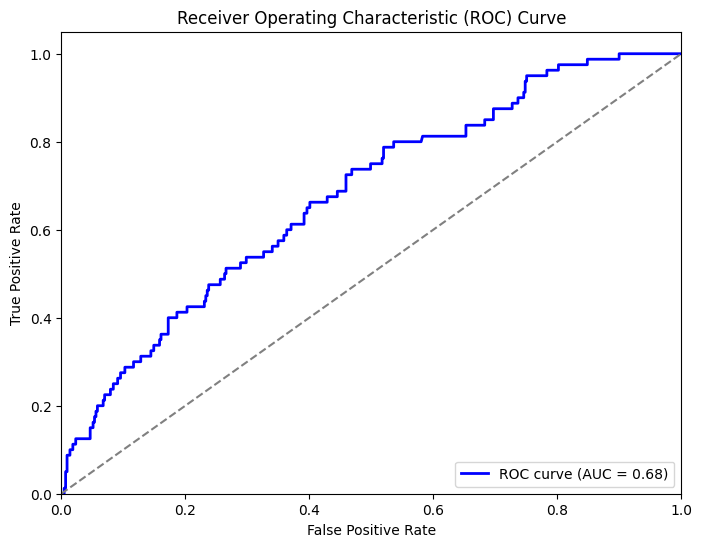

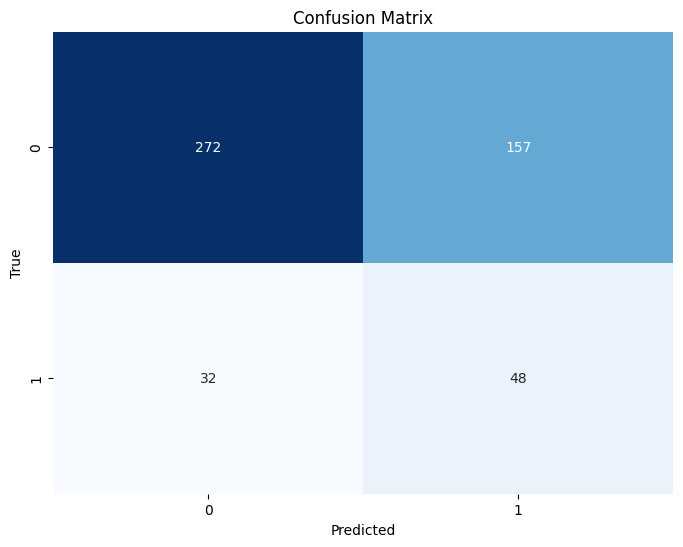

In [403]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Example usage of train_predict_evaluate_model function with Logistic Regression
train_predict_evaluate_model(logistic_regression, X_train_resampled, y_train_resampled, X_test_transformed, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       429
           1       0.20      0.20      0.20        80

    accuracy                           0.75       509
   macro avg       0.53      0.53      0.53       509
weighted avg       0.75      0.75      0.75       509



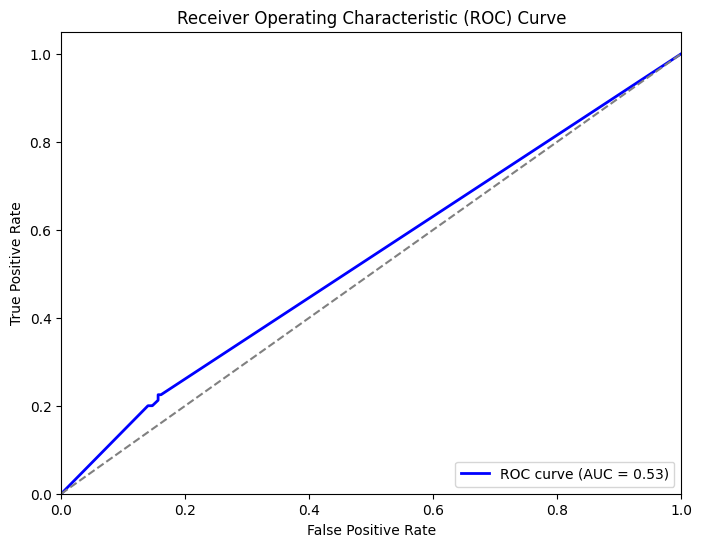

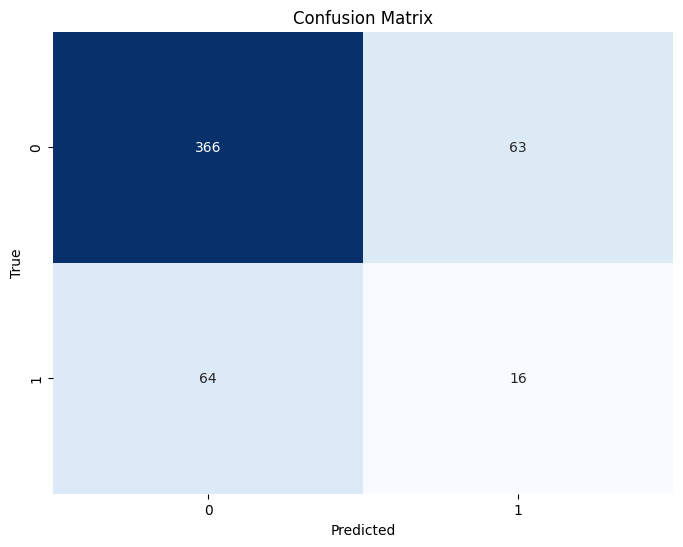

In [404]:
# Define Decision Tree model
decision_tree = DecisionTreeClassifier()
# Example usage of train_predict_evaluate_model function with Decision Tree and hyperparameter grid
train_predict_evaluate_model(decision_tree, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

In [405]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest model
random_forest = RandomForestClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       429
           1       0.24      0.30      0.27        80

    accuracy                           0.74       509
   macro avg       0.55      0.56      0.55       509
weighted avg       0.77      0.74      0.75       509



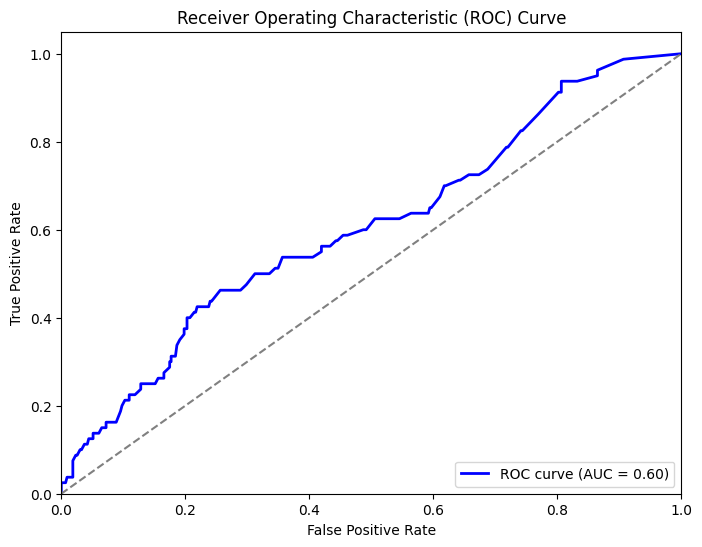

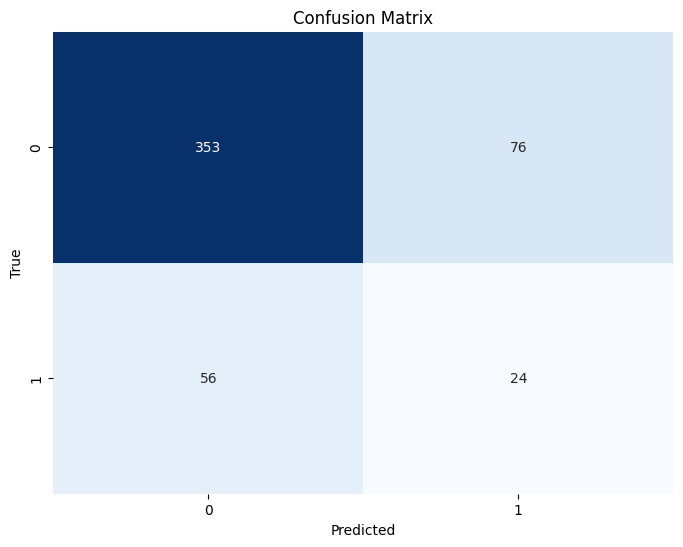

In [406]:
# Example usage of train_predict_evaluate_model function with Random Forest and hyperparameter grid
train_predict_evaluate_model(random_forest, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       429
           1       0.22      0.40      0.28        80

    accuracy                           0.68       509
   macro avg       0.54      0.57      0.54       509
weighted avg       0.77      0.68      0.72       509



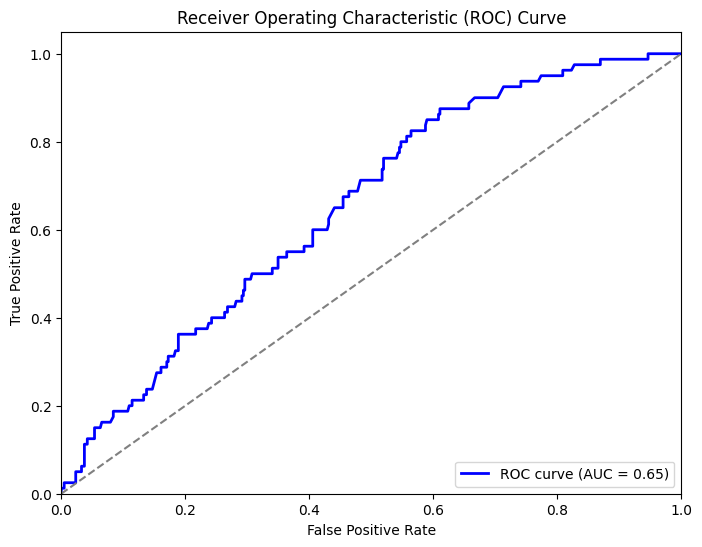

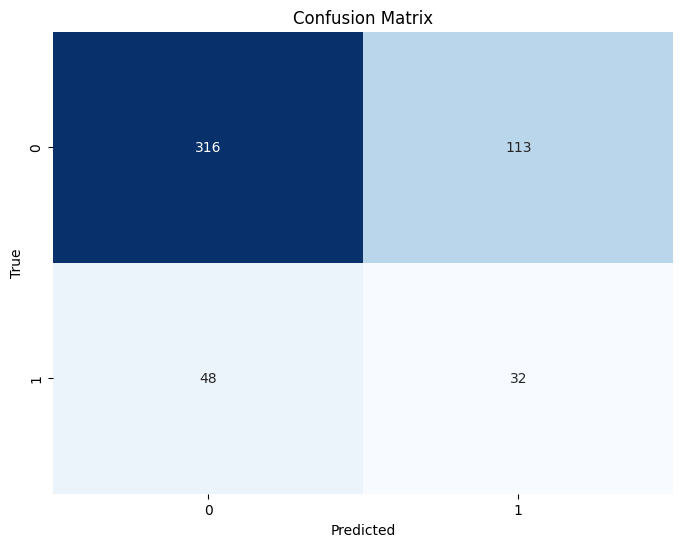

In [407]:
from sklearn.ensemble import GradientBoostingClassifier

# Define Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()

# Example usage of train_predict_evaluate_model function with Gradient Boosting and hyperparameter grid
train_predict_evaluate_model(gradient_boosting, X_train_resampled, y_train_resampled, X_test_transformed, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       429
           1       0.24      0.56      0.33        80

    accuracy                           0.65       509
   macro avg       0.56      0.61      0.55       509
weighted avg       0.79      0.65      0.69       509



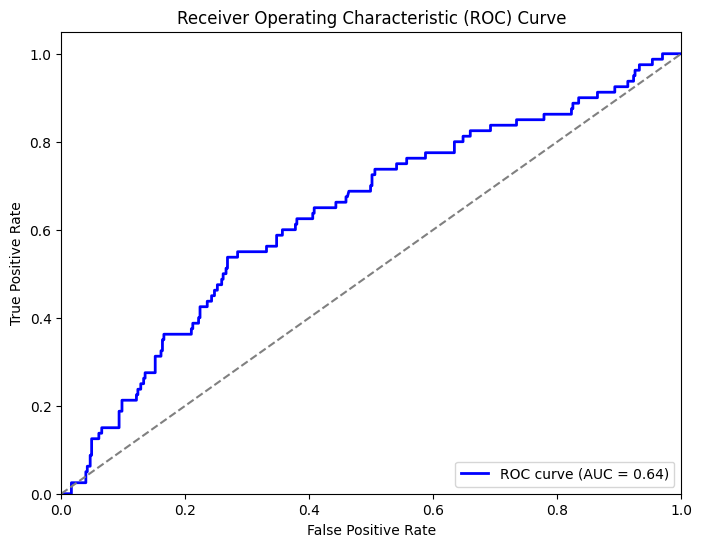

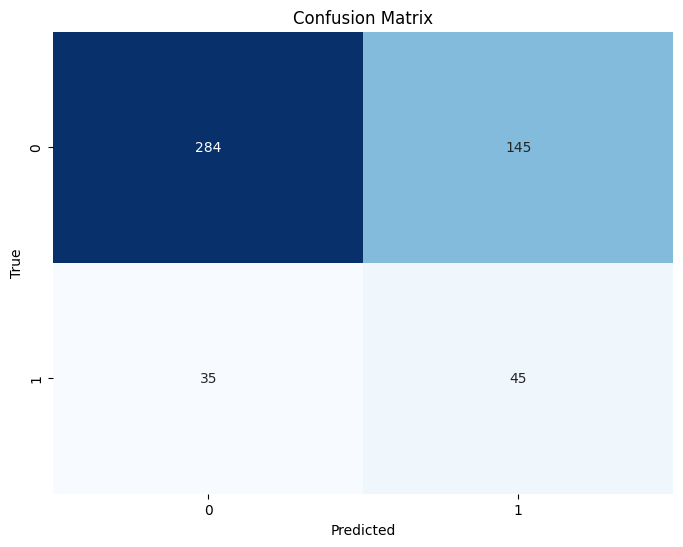

In [412]:
from sklearn.svm import SVC

# Define Support Vector Machine (SVM) model with probability=True
svm = SVC(probability=True)

# Example usage of train_predict_evaluate_model function with SVM and hyperparameter grid
train_predict_evaluate_model(svm, X_train_resampled, y_train_resampled, X_test_transformed, y_test)

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***